# Import Modules

In [99]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from collections import namedtuple
import numpy.linalg as npl
from sets import Set
from sklearn.metrics.pairwise import euclidean_distances

# Define Data-structures

In [100]:
Ball = namedtuple("Ball", ["center", "radius"])
BlurredBall = namedtuple("BlurredBall", ["k", "MEB"])

# Data Generator Methods

In [101]:
def generate_normal_data(num_of_points, num_of_dimensions):
    mean = random.sample(np.array(range(100)), num_of_dimensions)
    scalar_variances = 10.0 * np.ones(num_of_dimensions)
    covariance = np.diag(scalar_variances)
    points = np.random.multivariate_normal(mean, covariance, num_of_points)
    return points

def generate_multivariate_data(num_of_points, num_of_dimensions):
    probabilities = [float(1.0 / num_of_dimensions)] * num_of_dimensions
    points = np.random.multinomial(20, probabilities, size = num_of_points)
    return points


# Approximate MEB : Using this for "Exact" MEB Tentatively

In [102]:
def approx_meb_light(points, epsilon):
    coreset = []
    num_of_points = len(points)
    furthest_point = None
    center = points[0]
    radius = 0.0
    num_iterations = int(1.0 / (epsilon * epsilon)) # 4.0 / epsilon
    distances = {}
    prev_radius = -10000.0
    coreset = [points[0]]
    for i in range(1, num_iterations):
        for j in range(num_of_points):
            distances[j] = npl.norm(points[j] - center)
        furthest_point_index = max(distances, key = distances.get)
        furthest_point = points[furthest_point_index]
        furthest_distance = distances[furthest_point_index]

        center = center + (1.0 / i) * (furthest_point - center)   
        if abs(furthest_distance - prev_radius) < 0.01: # epsilon * current_radius
            break
        prev_radius = furthest_distance
            
    radius = npl.norm(furthest_point - center)
    meb = Ball(center, radius)
    return meb

# Epsilon Coreset from Badoiu and Clarkson

In [103]:
def epsilon_coreset(points, epsilon):
    coreset = []
    num_of_points = len(points)
    furthest_point = None
    center = points[0]
    radius = 0.0

    num_iterations = int(2.0 / (epsilon))
    print("Total Iterations: " + repr(num_iterations))
    distances = {}
    coreset_indices = Set()

    prev_radius = -10000.0
    
    coreset = [points[0]]
    for i in range(1, num_iterations):
        #print("Iteration: ", i, " radius: ", prev_radius)
        # Find furthest point
        for j in range(num_of_points):
            distances[j] = npl.norm(points[j] - center)
        # Calculated furthest point    
        furthest_point_index = max(distances, key = distances.get)
        furthest_point = points[furthest_point_index]
        furthest_distance = distances[furthest_point_index]
        if furthest_point_index in coreset_indices:
            continue
        coreset_indices.add(furthest_point_index)
        coreset.append(furthest_point)
        coreset_meb = approx_meb_light(coreset, 0.01) # test with exact
        center = coreset_meb.center
        
    return coreset

In [104]:
points = generate_normal_data(1000, 2)
print(points)

[[  93.76961712   67.59280148]
 [  99.84755088   70.97878679]
 [  96.25381007   63.87423499]
 ..., 
 [ 102.06224817   63.64133116]
 [  97.57098673   69.02707328]
 [  97.87294974   61.71742683]]


In [105]:
coreset = np.array(epsilon_coreset(points, 0.1))
print(coreset)

Total Iterations: 20
[[  93.76961712   67.59280148]
 [ 109.4269852    64.74138843]
 [  90.67628792   55.75331118]
 [ 100.20899753   76.2220793 ]]


In [108]:
meb_full = approx_meb_light(points, 0.1)
meb_coreset = approx_meb_light(coreset, 0.1)

print "Full MEB: ", meb_full
print "Coreset MEB: ", meb_coreset

Full MEB:  Ball(center=array([ 97.74791558,  64.77945706]), radius=11.466439168186307)
Coreset MEB:  Ball(center=array([ 97.68802951,  64.7560503 ]), radius=11.411127545773237)


In [109]:
def draw_points_and_meb(points, meb):
    xmin = min(points[:, 0])
    xmax = max(points[:, 0])
    ymin = min(points[:, 1])
    ymax = max(points[:, 1])
    print(xmin, xmax, ymin, ymax)
    processed_points = []
    fig, ax = plt.subplots(1, 1) 
    #ax.set_xlim(xmin - 10, xmax + 10)
    #ax.set_ylim(ymin - 10, ymax + 10)
    ax.set_aspect('equal', 'datalim')
    ax.set_xlim(xmin - 10, xmax + 10)
    ax.set_ylim(ymin - 10, ymax + 10)
    X = points[:, 0]
    Y = points[:, 1]
    scatters = plt.scatter(X, Y)
    center = meb.center
    radius = meb.radius
    circle = plt.Circle(center, radius, color='r', alpha = 0.1)
    ax.add_artist(circle)

(87.57628533173262, 109.42698519510866, 54.48040497144477, 76.222079295369014)


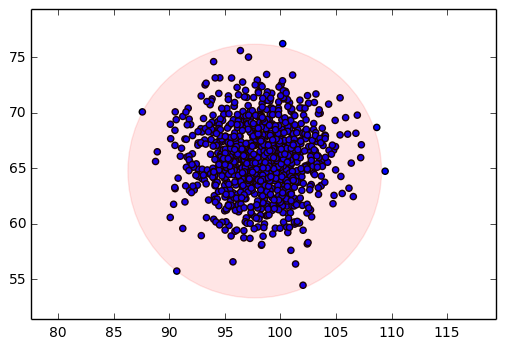

In [110]:
draw_points_and_meb(points, meb_coreset)

(87.57628533173262, 109.42698519510866, 54.48040497144477, 76.222079295369014)


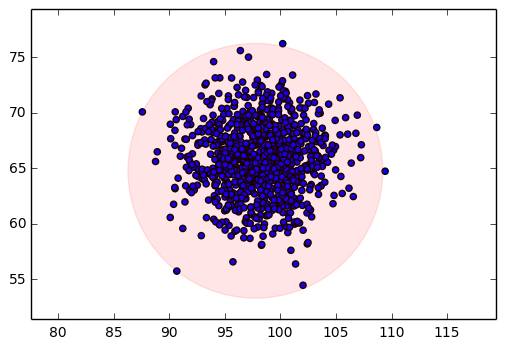

In [111]:
draw_points_and_meb(points, meb_full)